# Predicting the sale price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example of a machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
> The data is downloaded from kaggle

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean sqaured log error) between the actaul and predicted auction prices.

**Note:** the goal of most regression evaluation metrics is to minimize error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4 Features
kaggle provides a data dictionary detailing all of the features of the datasets. 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [67]:
# import training ad validation sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [68]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [69]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [70]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<module 'matplotlib.pyplot' from 'C:\\Users\\JD\\Desktop\\bulldozer-price-prediction-project\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

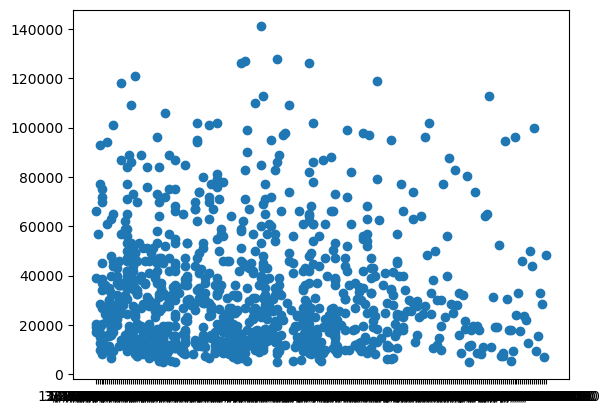

In [71]:
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:1000], df.SalePrice [:1000])
plt

<Axes: ylabel='Frequency'>

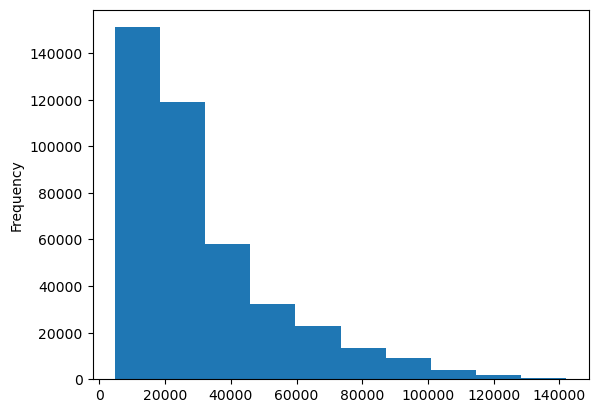

In [72]:
df.SalePrice.plot.hist()

### Parsing dates

when we work with time series data, we want to enrich the time & data component as much as possible.

we can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter.

In [73]:
df = pd.read_csv("data/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=["saledate"])

In [74]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [75]:
# when we changed our time series column to datetime, our df dataset was replaced so it affected/influnced everthing that as why the scatter plot changed/arranged

In [76]:
df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## sort DataFrame by saledate

when working with time series data, its good practice to sort the date

In [77]:
# sort dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [78]:
# make a copy
df_exp = df.copy()
# so if we make changes to df_exp it wont affect df

In [79]:
df_exp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Feature Engineering 
it means either creating a new feature, or explorig a particular feature and changing it a little bit.

### Add datetime parameters for `saledate` column

In [80]:
df_exp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [81]:
df_exp["sale year"]= df_exp.saledate.dt.year
df_exp["sale month"]= df_exp.saledate.dt.month
df_exp["sale day"]= df_exp.saledate.dt.day
df_exp["sale day of week"]= df_exp.saledate.dt.dayofweek
df_exp["sale day of year"]= df_exp.saledate.dt.dayofyear

In [82]:
df_exp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [83]:
# ow we've enriched our DataFrame with date time Features, we ca remove `saledate`
df_exp.drop("saledate", axis=1, inplace=True,)

In [84]:
df_exp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Modeling

we have done  enough EDA(exploratory data analysis) ow lwts do some model-drive EDA.

### Turinng data to numbers

convert string to categories

one way of turning all of our data to into numbers is by converting them into pandas categories.

### Finding the columns that contain strings

In [85]:
# maually
pd.api.types.is_object_dtype(df_exp["UsageBand"])

True

In [86]:
# using for loop
for label, content in df_exp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [87]:
# using for looop to turn the string value into category values
for label, content in df_exp.items():
    if pd.api.types.is_object_dtype(content):
        df_exp[label]=content.astype("category").cat.as_ordered()

In [88]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [89]:
df_exp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [90]:
df_exp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [91]:
# check for missing values
df_exp.isna().sum()/len(df_exp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [92]:
#export current exp dataframe
df_exp.to_csv("data/train_exp.csv")

### Filling missing value


In [93]:
for label, content in df_exp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
sale year
sale month
sale day
sale day of week
sale day of year


In [94]:
df_exp.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [95]:
# check for which numeric columns have null values
for label,content in df_exp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [96]:
# fill numeric rows with median 
for label,content in df_exp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing or not
            df_exp[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric values with median
            df_exp[label]= content.fillna(content.median())

In [97]:
# we used medium because it is more robust to outliers
# there are outliers in the data so it is advised to fill with medium because the mean value will also be an outlier

In [98]:
# check for which numeric columns have null values
for label,content in df_exp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [99]:
# missing values has been field therefore no column is printed

In [100]:
# check to see how many examples were missing
df_exp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling as turning categorical variables into numbers

In [101]:
# check for columns which are not numeric
for label, content in df_exp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [102]:
# How to Turn categories into numbers
pd.Categorical(df_exp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [103]:
# turn categorical variales into numbers and fill missing
for label, content in df_exp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binarry column to indicate whether sample had a missing value
        df_exp[label+"_is_missing"]= pd.isnull(content)
        # Turn categories into numbers and add +1
        df_exp[label]= pd.Categorical(content).codes+1
        # we are adding plus 1 to avoid getting a -1 value

In [104]:
df_exp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [105]:
df_exp.isna().sum()[:10]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
dtype: int64

In [106]:
# %%time
# #calc the time the cell takes to run
from sklearn.ensemble import RandomForestRegressor
# x= df_exp.drop("SalePrice", axis=1)
# y=df_exp["SalePrice"]
# # instantiate model
# model= RandomForestRegressor(n_jobs=-1, random_state=42 )
# # fit the model
# model.fit(x,y)

In [107]:
# the model predicted almost 1% because it was trained and scored on the same data
# instead of importig our train and validation set seperately, lets split the trainandvalid dataset that we imported earlier
# the validation set is going to me saleyear 2012, while ever other column will be the training set

In [108]:
df_val = df_exp[df_exp["sale year"] == 2012]
df_train = df_exp[df_exp["sale year"] != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [109]:
x_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]
x_valid = df_val.drop("SalePrice", axis=1)
y_valid = df_val["SalePrice"]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### building an evaluation fuction

In [110]:
# create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def RMSLE(y_test, y_preds):
    """
    calculates the root mea squared log error between predictionss and true laels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create a fuction to evaluate a model on a few different levels 
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "valid MAE":mean_absolute_error(y_valid, val_preds),
              "Training RMSLE":RMSLE(y_train, train_preds),
              "valid RMSLE": RMSLE(y_valid, val_preds),
              "Training r2":r2_score(y_train, train_preds),
              "valid r2":r2_score(y_valid, val_preds)}
    return scores

### Testing our models on a subset (to tune hyperparameters)

In [111]:
# &&time
# # fitting and testing our model takes too long(the run time)

# model = RandomForestRegressor(n_jobs, random_state=42)
# model.fit(x_train, y_train)

In [112]:
# change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [113]:
%%time
model.fit(x_train, y_train)

CPU times: total: 1min 22s
Wall time: 24.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [114]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.257745378256977),
 'valid RMSLE': np.float64(0.29362638671089003),
 'Training r2': 0.8606658995199189,
 'valid r2': 0.8320374995090507}

In [115]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different hyperparamters that RandomizedSearchCV should go through
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}
#instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 1min 51s
Wall time: 38.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [116]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [117]:
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [118]:
show_scores(rs_model)

{'Training MAE': 6942.399147847203,
 'valid MAE': 8668.800348692359,
 'Training RMSLE': np.float64(0.31095912024990635),
 'valid RMSLE': np.float64(0.3557478334974687),
 'Training r2': 0.7962170835217636,
 'valid r2': 0.7789701184466472}

### Training a model with the best hyperparameters

Note: these were found after 100 iterations of `RandomizedSearchCV`

In [119]:
%%time

# most ideal/best hyperparameters
ideal_model= RandomForestRegressor(n_estimators=40,
                                   min_samples_split=14,
                                   min_samples_leaf=1,
                                   max_samples=None,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   random_state=42)
# fit model
ideal_model.fit(x_train, y_train)

CPU times: total: 6min 37s
Wall time: 1min 51s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [120]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'valid MAE': 5951.247761444453,
 'Training RMSLE': np.float64(0.14469006962371858),
 'valid RMSLE': np.float64(0.2452416398953833),
 'Training r2': 0.9588145522577225,
 'valid r2': 0.8818019502450094}

# Make predictions on the test data with our ideal model


In [121]:
test_data = pd.read_csv("data/Test.csv", 
                        low_memory=False,
                        parse_dates=["saledate"])

In [122]:
test_data.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [123]:
test_data.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the data(getting the test data set in the same format a our training dataset)

In [124]:
def preprocess_data(test_data):
    """
    performs transformation on df and returns transformed df.
    """
    test_data["sale year"]= test_data.saledate.dt.year
    test_data["sale month"]= test_data.saledate.dt.month
    test_data["sale day"]= test_data.saledate.dt.day
    test_data["sale day of week"]= test_data.saledate.dt.dayofweek
    test_data["sale day of year"]= test_data.saledate.dt.dayofyear

    test_data.drop("saledate", axis=1, inplace=True)

    # fill numeric rows with median 
    for label,content in test_data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # add a binary column which tells us if the data was missing or not
                test_data[label+"_is_missing"] = pd.isnull(content)
                # fill missing numeric values with median
                test_data[label]= content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            test_data[label+"_is_missing"]= pd.isnull(content)
            # we add +1 to the category to avoid getting it filled with -1 by pandas
            test_data[label]= pd.Categorical(content).codes+1
            
    

    return test_data

In [125]:
test_data = preprocess_data(test_data)
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [126]:
# we cann checck if the columns for our traing and test data are equal
set(x_train.columns) - set(test_data.columns)

{'auctioneerID_is_missing'}

In [127]:
# maually adjust test_data to have the missig column
test_data["auctioneerID_is_missing"]=False
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [128]:
print("Training columns:", df_train.columns)
print("Test columns:", test_data.columns)

Training columns: Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=103)
Test columns: Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing', 'Thumb_is_missing',
       'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
       'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
       'Travel_Controls_is_missing', 'Differential_Type_is_missing'

In [ ]:
df_reordered = test_data.iloc[:,[0,]]

In [135]:
assert list(df_train.columns) == list(test_data.columns), "Column names do not match!"

AssertionError: Column names do not match!

In [137]:
test_data = test_data[df_train.columns]

KeyError: "['SalePrice'] not in index"

In [ ]:
# make predictions on test data
test_preds=ideal_model.predict(test_data)

In [ ]:
test_preds

In [ ]:
# putting it in kaggle format
df_preds = pd.DataFrame()
df_preds["salesID"] test_data["salesID"]
df_preds["SalesPrice"]=test_preds

In [ ]:
# export predictionn data
df_preds.to_csv["data/test_prediction.csv", index = False]

## Feature importance

feature importace seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable(sale price)

In [139]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [147]:
# helper function for plotting feature importance
def plot_features(columns, importance, n=20):
    df= (pd,DataFrame({"features": columns,
                       "feature_importance": importances})
        .sort_vaalues("feature_importances", accending=False)
         .reset_index(drop=True))
    #plot the dataframe
    fig,ax = plt.subplots()
    ax.bar(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")

In [148]:
plot_features(df_train.columns, ideal_model.feature_importances_)

NameError: name 'DataFrame' is not defined